In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
import os
from tqdm import tqdm
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.backend import clear_session
import gc

In [9]:
images = []
labels = []

main_directory = 'F:\DataScience\Educational\Computer Vision\Animals classification\data'

for animal in tqdm(os.listdir(main_directory)):
    for i in range(len(os.listdir(main_directory + '\\' + animal))):
        if i <= 59:
            img = cv2.imread(main_directory + '\\' + animal + '\\' + os.listdir(main_directory + '\\' + animal)[i])
            resized_img = cv2.resize(img,(128,128))
            resized_img = resized_img / 255.0
            images.append(resized_img)
            labels.append(animal)

images = np.array(images,dtype = 'float32')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:38<00:00,  2.36it/s]


In [11]:
gc.collect()

1041

In [12]:
le = preprocessing.LabelEncoder()
le.fit(labels)
class_names = le.classes_
labels = le.transform(labels)

labels = np.array(labels, dtype = 'uint8')
labels = np.resize(labels, (len(labels),1))

In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, stratify = labels)

f:\datascience\educational\env\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


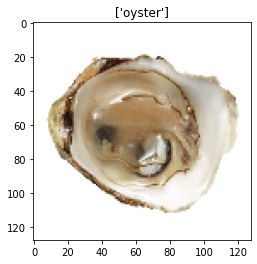

In [14]:
n = np.random.randint(0,np.shape(train_images)[0])
temp_pic = cv2.cvtColor(train_images[n], cv2.COLOR_BGR2RGB)  

plt.imshow(temp_pic)
plt.title(str(le.inverse_transform([train_labels[n]])))
plt.show()

In [15]:
conv_base = VGG16(weights='imagenet',
 include_top=False, input_shape = (128, 128, 3))
conv_base.trainable = False

VGG16_model = models.Sequential()
VGG16_model.add(conv_base)
VGG16_model.add(layers.Flatten())
VGG16_model.add(layers.Dense(90, activation='softmax'))
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 90)                737370    
                                                                 
Total params: 15,452,058
Trainable params: 737,370
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
VGG16_model.compile(loss='sparse_categorical_crossentropy',
 optimizer=optimizers.Adam(learning_rate = 1e-4),
 metrics=['accuracy'])

In [17]:
vgg_history = VGG16_model.fit(train_images, train_labels, batch_size = 64, epochs = 30, validation_split = 0.2)

Epoch 1/30
48/48 [==============================] - 14s 199ms/step - loss: 4.4190 - accuracy: 0.0443 - val_loss: 4.1512 - val_accuracy: 0.0886
Epoch 2/30
48/48 [==============================] - 8s 157ms/step - loss: 3.7448 - accuracy: 0.2315 - val_loss: 3.7820 - val_accuracy: 0.1772
Epoch 3/30
48/48 [==============================] - 8s 158ms/step - loss: 3.2431 - accuracy: 0.4229 - val_loss: 3.4850 - val_accuracy: 0.2447
Epoch 4/30
48/48 [==============================] - 8s 158ms/step - loss: 2.8243 - accuracy: 0.5741 - val_loss: 3.2473 - val_accuracy: 0.3161
Epoch 5/30
48/48 [==============================] - 8s 159ms/step - loss: 2.4760 - accuracy: 0.6700 - val_loss: 3.0471 - val_accuracy: 0.3505
Epoch 6/30
48/48 [==============================] - 8s 160ms/step - loss: 2.1877 - accuracy: 0.7183 - val_loss: 2.9033 - val_accuracy: 0.3651
Epoch 7/30
48/48 [==============================] - 8s 159ms/step - loss: 1.9466 - accuracy: 0.7698 - val_loss: 2.7632 - val_accuracy: 0.4048
Epoch

In [19]:
vgg_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

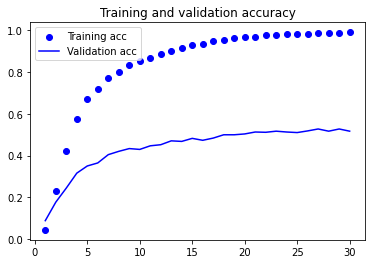

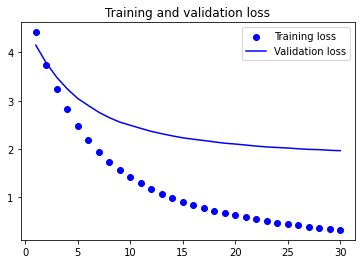

In [21]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.scatter(epochs, acc, color ='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.scatter(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
vgg_predictions = VGG16_model.predict(test_images)
vgg_predictions = np.argmax(vgg_predictions,axis = 1)

51/51 [==============================] - 5s 78ms/step


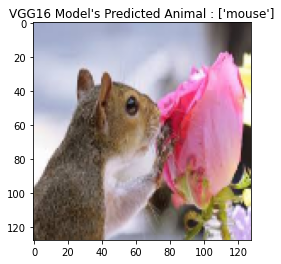

In [76]:
n = np.random.randint(0,np.shape(test_images)[0])
temp_pic = cv2.cvtColor(test_images[n], cv2.COLOR_BGR2RGB)  
plt.imshow(temp_pic)
plt.title("VGG16 Model's Predicted Animal : " + str(le.inverse_transform([vgg_predictions[n]])))
plt.show()